# Processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/dataset_normalized_fin.csv')
df.head(5)

,CHRONIC_DISEASE,ANXIETY,AGE,CHEST_PAIN,LUNG_CANCER,PEER_PRESSURE,COUGHING,YELLOW_FINGERS,BREATHING_ISSUE,ALCOHOL_CONSUMING,SMOKING,GENDER
0,0,1,68,1,0,1,1,1,0,1,1,1
1,1,0,81,0,1,1,1,0,1,0,1,1
2,0,0,58,0,0,0,0,0,1,1,1,1
3,0,1,44,0,1,1,1,0,1,0,1,0
4,1,1,72,0,1,1,1,1,1,0,1,0


In [ ]:
df.describe()

,CHRONIC_DISEASE,ANXIETY,AGE,CHEST_PAIN,LUNG_CANCER,PEER_PRESSURE,COUGHING,YELLOW_FINGERS,BREATHING_ISSUE,ALCOHOL_CONSUMING,SMOKING,GENDER
count,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000,21754.000000
mean,0.496828,0.503861,60.205893,0.542659,0.702078,0.502528,0.572309,0.554427,0.623196,0.503494,0.554059,0.515767
std,0.500001,0.499997,11.842313,0.498188,0.457356,0.500005,0.494755,0.497040,0.484596,0.499999,0.497080,0.499763
min,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,61.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
CHRONIC_DISEASE,0
ANXIETY,0
AGE,0
CHEST_PAIN,0
LUNG_CANCER,0
PEER_PRESSURE,0
COUGHING,0
YELLOW_FINGERS,0
BREATHING_ISSUE,0
ALCOHOL_CONSUMING,0


In [ ]:
df.dtypes

,0
CHRONIC_DISEASE,int64
ANXIETY,int64
AGE,int64
CHEST_PAIN,int64
LUNG_CANCER,int64
PEER_PRESSURE,int64
COUGHING,int64
YELLOW_FINGERS,int64
BREATHING_ISSUE,int64
ALCOHOL_CONSUMING,int64


In [ ]:
df['GENDER'] = df['GENDER'].astype(str).map({'M': 1, 'F': 0, '1': 1, '0': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

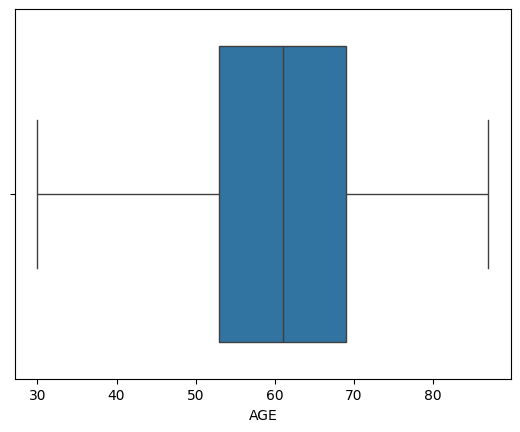

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['AGE'])
plt.show()

In [ ]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['AGE'] < Q1 - 1.5*IQR) | (df['AGE'] > Q3 + 1.5*IQR)]
outliers.shape

(0, 12)

In [ ]:
df.duplicated().sum()

np.int64(2326)

In [ ]:
df[df.duplicated()]

,CHRONIC_DISEASE,ANXIETY,AGE,CHEST_PAIN,LUNG_CANCER,PEER_PRESSURE,COUGHING,YELLOW_FINGERS,BREATHING_ISSUE,ALCOHOL_CONSUMING,SMOKING,GENDER
361,0,0,62,0,NaN,0,1,0,1,0,1,1
644,1,1,78,1,NaN,1,1,1,1,0,1,0
684,0,1,64,1,NaN,0,1,1,1,0,1,0
966,1,1,77,1,NaN,0,0,1,1,0,1,1
990,0,1,48,0,NaN,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21734,0,1,64,1,NaN,0,1,0,1,1,0,1
21735,0,0,52,0,NaN,0,0,1,1,1,1,1
21736,0,1,75,0,NaN,0,1,1,1,1,0,1
21744,0,0,55,0,NaN,0,0,1,1,1,1,0


In [ ]:
df = df.drop_duplicates()
df.shape

(19428, 12)

In [ ]:
df.isna().sum()

,0
CHRONIC_DISEASE,0
ANXIETY,0
AGE,0
CHEST_PAIN,0
LUNG_CANCER,19428
PEER_PRESSURE,0
COUGHING,0
YELLOW_FINGERS,0
BREATHING_ISSUE,0
ALCOHOL_CONSUMING,0


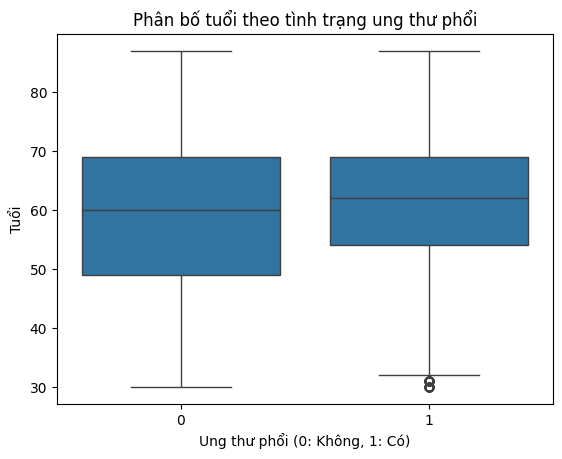

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='LUNG_CANCER', y='AGE')
plt.title('Phân bố tuổi theo tình trạng ung thư phổi')
plt.xlabel('Ung thư phổi (0: Không, 1: Có)')
plt.ylabel('Tuổi')
plt.show()

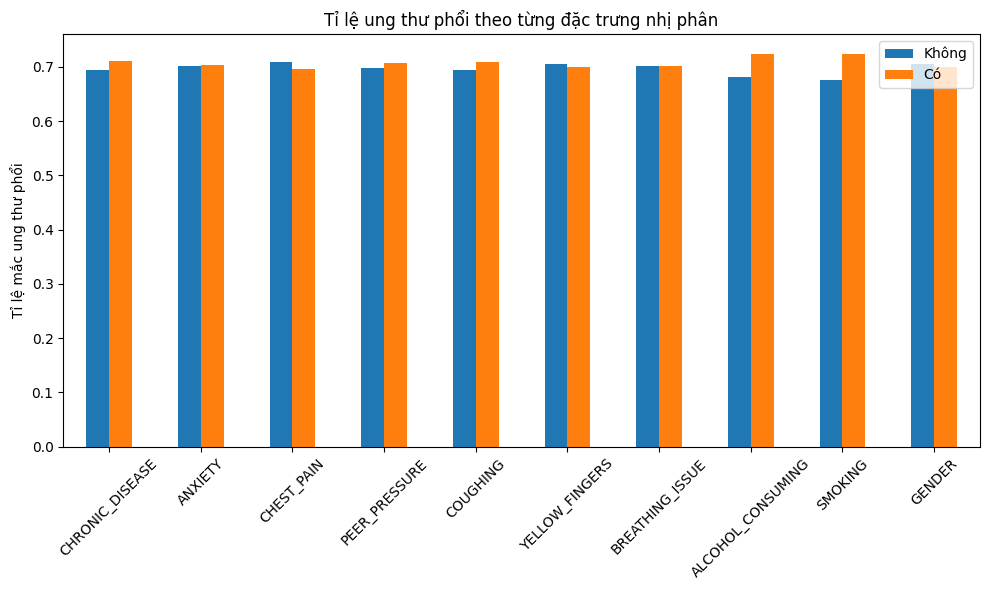

In [ ]:
binary_features = ['CHRONIC_DISEASE', 'ANXIETY', 'CHEST_PAIN', 'PEER_PRESSURE',
                   'COUGHING', 'YELLOW_FINGERS', 'BREATHING_ISSUE',
                   'ALCOHOL_CONSUMING', 'SMOKING', 'GENDER']

lung_cancer_rate = {}

for feature in binary_features:
    rate = df.groupby(feature)['LUNG_CANCER'].mean()
    lung_cancer_rate[feature] = rate

rate_df = pd.DataFrame(lung_cancer_rate).T
rate_df.columns = ['Không', 'Có']
rate_df.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Tỉ lệ mắc ung thư phổi')
plt.title('Tỉ lệ ung thư phổi theo từng đặc trưng nhị phân')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

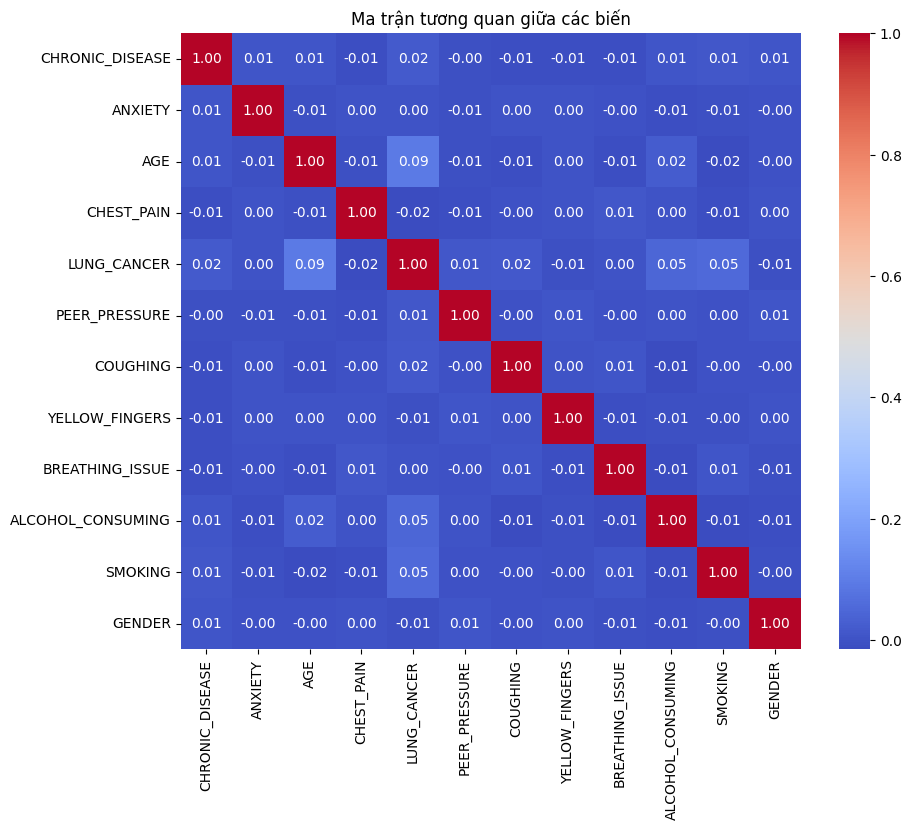

In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các biến')
plt.show()

In [ ]:
df

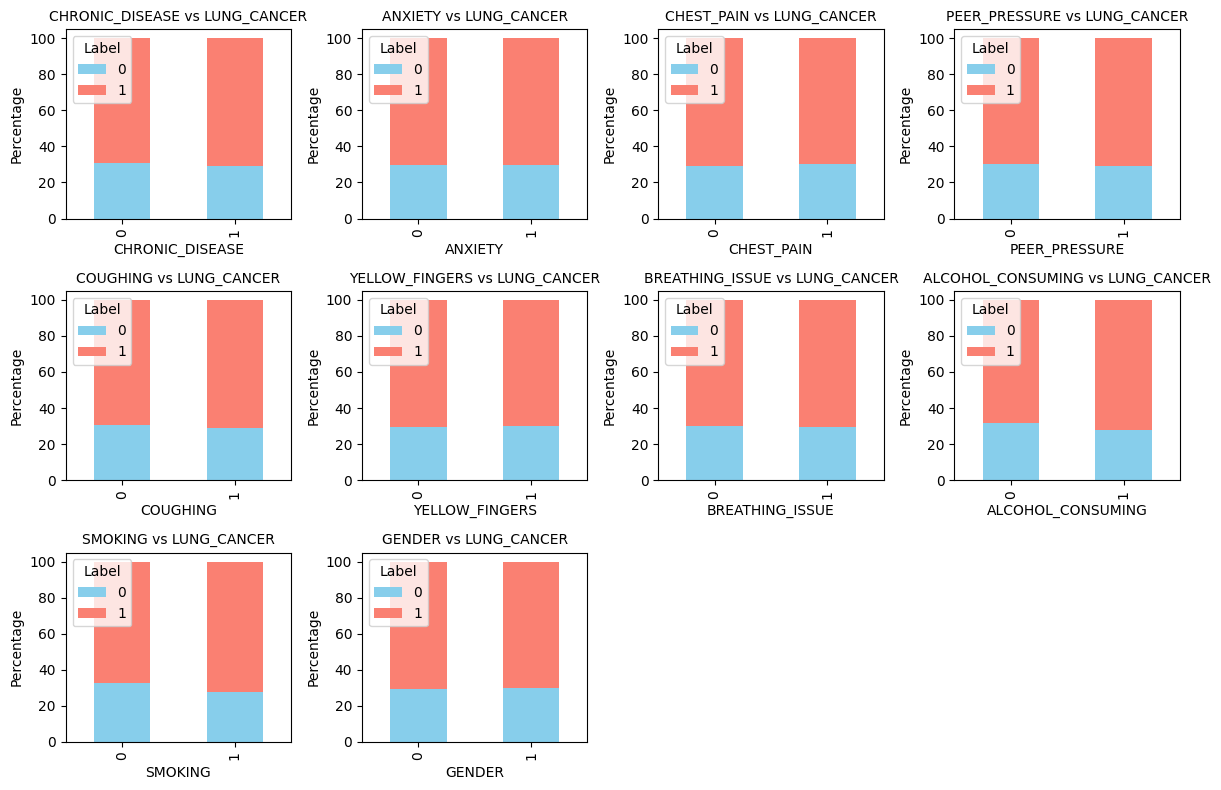

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('final_final_dataset.csv')
column_names = [
    'CHRONIC_DISEASE', 'ANXIETY', 'CHEST_PAIN',
    'PEER_PRESSURE', 'COUGHING', 'YELLOW_FINGERS', 'BREATHING_ISSUE',
    'ALCOHOL_CONSUMING', 'SMOKING', 'GENDER'
]
target_column = 'LUNG_CANCER'


# Thiết lập kích thước lưới subplot
num_column = len(column_names)
fig, axes = plt.subplots(
    nrows=(num_column + 3) // 4,    # Số hàng
    ncols=4,                        # Số cột
    figsize=(12, 4 * ((num_column + 1) // 4)),  # Kích thước tổng thể
)

axes = axes.flatten()  # Chuyển axes thành 1D để dễ truy cập

for i, column in enumerate(column_names):
    # Bảng tần suất chéo với phần trăm
    crosstab = pd.crosstab(
        dataset[column],
        dataset[target_column],
        normalize='index'  # Chuẩn hóa theo hàng
    ) * 100

    # Vẽ biểu đồ stacked bar
    crosstab.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],  # Subplot tương ứng
        color=['skyblue', 'salmon']  # Màu tùy chỉnh
    )

    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'{column} vs {target_column}', fontsize=10)
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title='Label', loc='upper left')

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

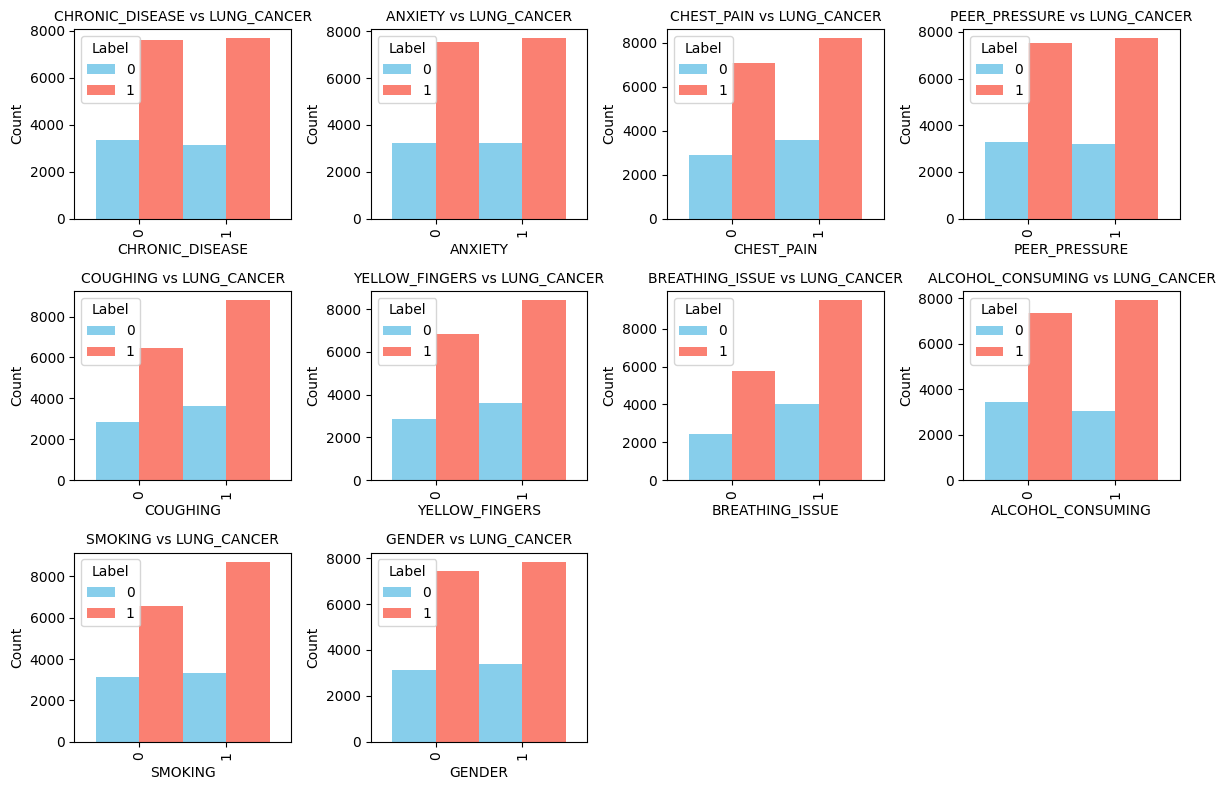

In [ ]:
# Thiết lập kích thước lưới subplot
num_column = len(column_names)
fig, axes = plt.subplots(
    nrows=(num_column + 3) // 4,    # Số hàng
    ncols=4,                        # Số cột
    figsize=(12, 4 * ((num_column + 1) // 4)),  # Kích thước tổng thể
)

axes = axes.flatten()  # Chuyển axes thành 1D để dễ truy cập

for i, column in enumerate(column_names):
    # Bảng tần suất chéo với phần trăm
    crosstab = pd.crosstab(
        dataset[column],
        dataset[target_column],
    )

    # Vẽ biểu đồ stacked bar
    crosstab.plot(
        kind='bar',
        ax=axes[i],  # Subplot tương ứng
        color=['skyblue', 'salmon'],  # Màu tùy chỉnh
        width=1
    )

    # Tùy chỉnh tiêu đề và nhãn
    axes[i].set_title(f'{column} vs {target_column}', fontsize=10)
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Label', loc='upper left')

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

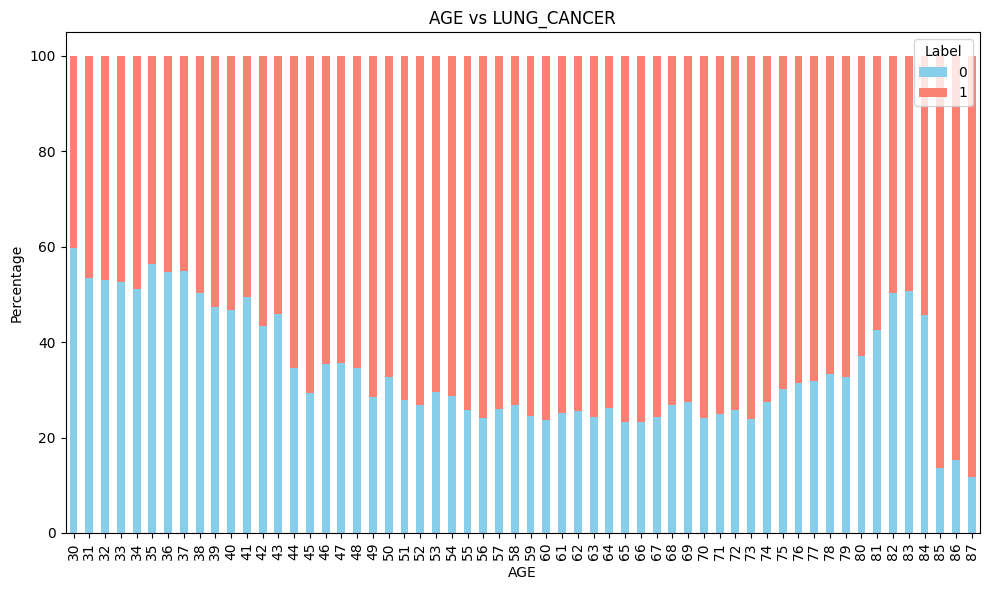

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('dataset_normalized_fin.csv')
column='AGE'
target_column = 'LUNG_CANCER'

# Tạo bảng tần suất chéo (crosstab), chuẩn hóa theo hàng (tính phần trăm)
crosstab = pd.crosstab(
    dataset[column],
    dataset[target_column],
    normalize='index'
) * 100  # đổi thành %

# Vẽ biểu đồ stacked bar
crosstab.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'salmon']
)

# Thiết lập nhãn và tiêu đề
plt.title(f'{column} vs {target_column}')
plt.xlabel(column)
plt.ylabel('Percentage')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

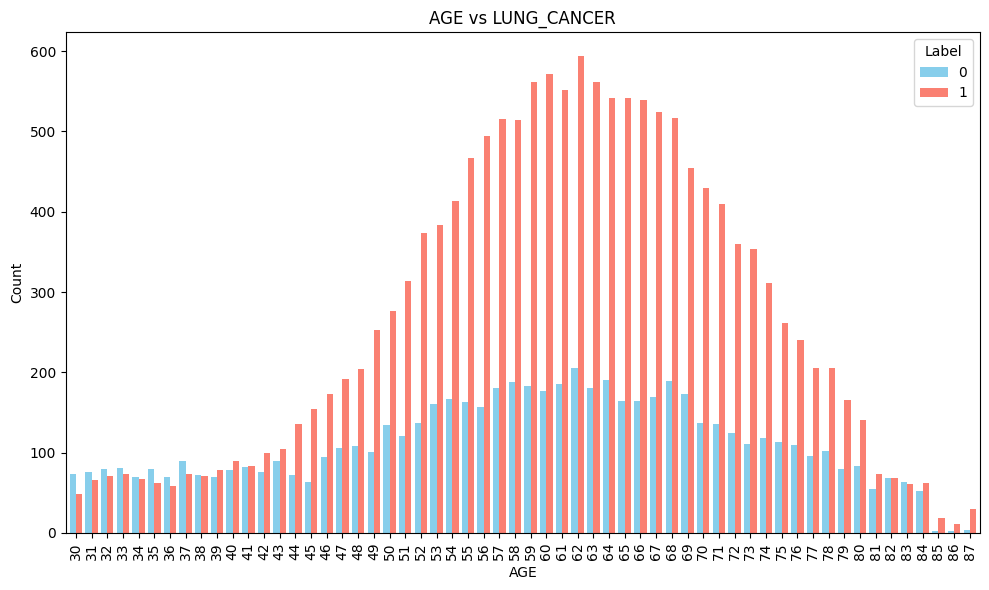

In [ ]:
column='AGE'

# Tạo bảng tần suất chéo (crosstab), chuẩn hóa theo hàng (tính phần trăm)
crosstab = pd.crosstab(
    dataset[column],
    dataset[target_column],
)

# Vẽ biểu đồ stacked bar
crosstab.plot(
    kind='bar',
    figsize=(10, 6),
    color=['skyblue', 'salmon'],
    width=0.8
)

# Thiết lập nhãn và tiêu đề
plt.title(f'{column} vs {target_column}')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

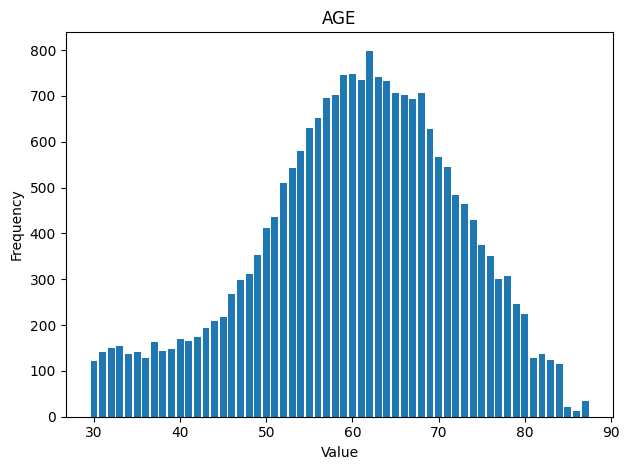

In [ ]:
data_counts = dataset['AGE'].value_counts().sort_index()

# Vẽ biểu đồ cột
plt.bar(data_counts.index, data_counts.values)


# Tùy chỉnh biểu đồ
plt.title("AGE")
plt.xlabel("Value")
plt.ylabel("Frequency")
 # Đảm bảo các tên category không bị nghiêng
plt.tight_layout()
# Hiển thị biểu đồ
plt.show()